# Initialization

This notebook will train the Logistic Regression in **One vs Rest** decision function. The Multinomial Logistic Regression is in the Softmax Regression notebook

Connect to Google Drive:

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages (may need to add more):

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [3]:
X_train = X_train_tfidf_L1
X_test = X_test_tfidf_L1

# Basic training

In [4]:
lr_model = LogisticRegression(multi_class='ovr')
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9146
	- Micro F1 score: 0.9146
	- Macro F1 score: 0.8702
Score of on test are:
	- Accuracy score: 0.8357
	- Micro F1 score: 0.8357
	- Macro F1 score: 0.7723


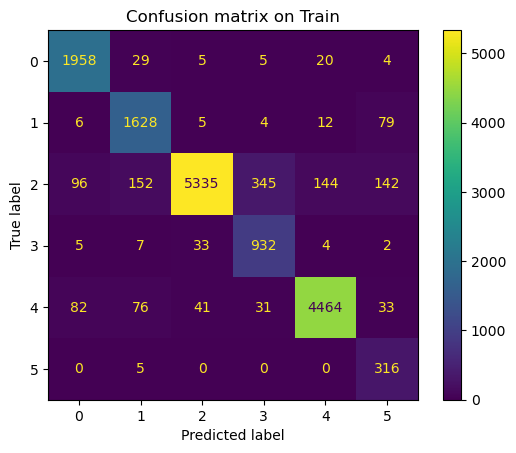

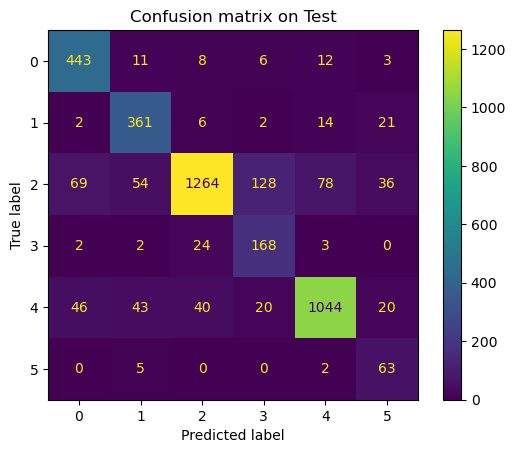

In [5]:
evaluate_model(lr_model, X_train, X_test, y_train, y_test, include_training=True)

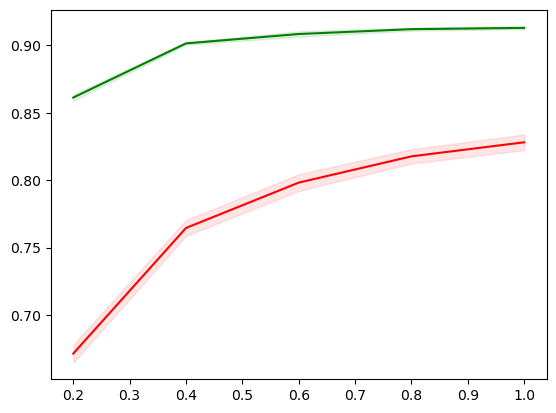

In [6]:
draw_learning_curve(lr_model, X_train, y_train)

# Multiple tuning

## L1 regularization

First, we try to plot the validation score through a list of C from 0.001 to 100

In [7]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l1', solver='liblinear', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3386875, 0.3386875, 0.64225, 0.87825, 0.974375, 0.9855, 0.9859375]
[0.3386875000000001, 0.3386875000000001, 0.47806249999999995, 0.8581249999999999, 0.8648125, 0.8624375000000001, 0.8542500000000001]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

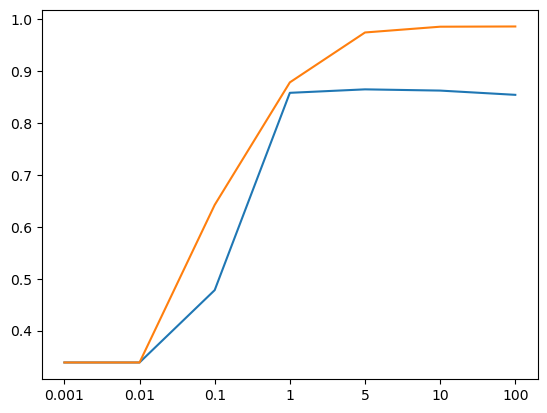

In [8]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = 5$, then we scope to $C=5$:

In [9]:
C_list = [4.1, 4.25, 4.5, 5, 5.25, 5.5, 5.75, 6]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l1', solver='liblinear', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[4.1, 4.25, 4.5, 5, 5.25, 5.5, 5.75, 6]
[0.9625625, 0.964875, 0.9685625, 0.974375, 0.9765, 0.9783125, 0.9795625, 0.9808125]
[0.8648125, 0.8651249999999999, 0.8651875, 0.8648750000000002, 0.8647500000000001, 0.8644375, 0.8640625, 0.86425]


[Text(0, 0, '4.1'),
 Text(1, 0, '4.25'),
 Text(2, 0, '4.5'),
 Text(3, 0, '5'),
 Text(4, 0, '5.25'),
 Text(5, 0, '5.5'),
 Text(6, 0, '5.75'),
 Text(7, 0, '6')]

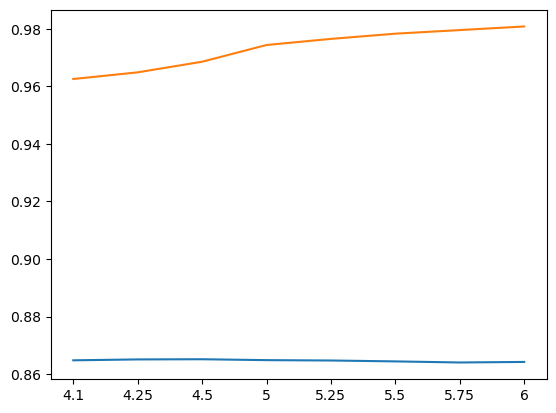

In [10]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=4.5$ to be the best one

In [11]:
best_l1_lr_model = LogisticRegression(C=4.5, penalty='l1', solver='liblinear', multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9686
	- Micro F1 score: 0.9686
	- Macro F1 score: 0.9612
Score of on test are:
	- Accuracy score: 0.8690
	- Micro F1 score: 0.8690
	- Macro F1 score: 0.8257


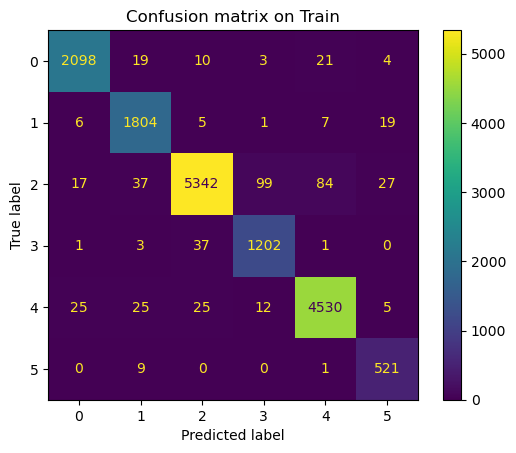

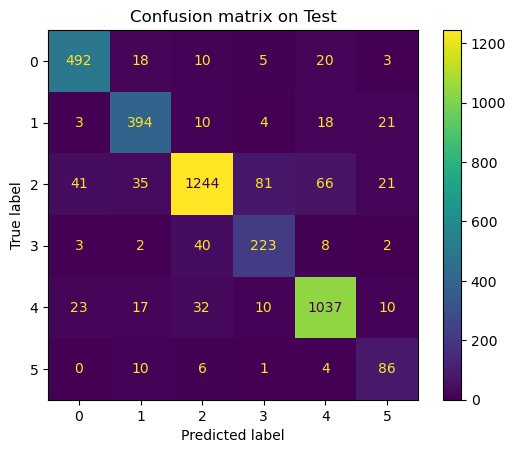

In [12]:
best_l1_lr_model.fit(X_train, y_train)
evaluate_model(best_l1_lr_model, X_train, X_test, y_train, y_test, include_training=True)

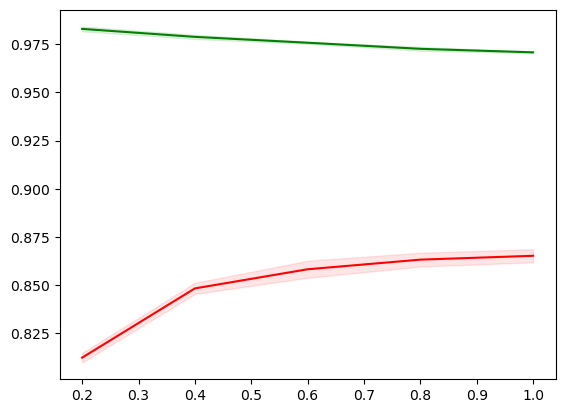

In [13]:
draw_learning_curve(best_l1_lr_model, X_train, y_train)

## L2 regularization

We do the same things from here

In [14]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3386875, 0.3738125, 0.6751875, 0.9145625, 0.9759375, 0.98325, 0.986]
[0.3386875000000001, 0.3488125, 0.6248125000000001, 0.828125, 0.8576874999999999, 0.8593125, 0.8568749999999999]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

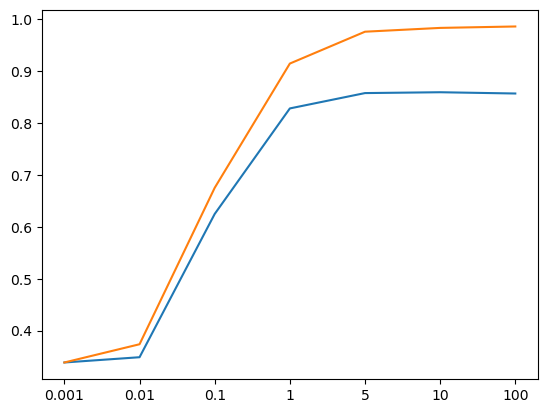

In [15]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

It looks like good $C$ is near $5$

In [19]:
C_list = [4.1, 4.25, 4.5, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[4.1, 4.25, 4.5, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5]
[0.971625, 0.9723125, 0.973375, 0.9759375, 0.976875, 0.977625, 0.9785625, 0.9790625, 0.9793125, 0.9796875, 0.9801875, 0.9805, 0.9809375, 0.9810625]
[0.856625, 0.8568749999999999, 0.8575000000000002, 0.8576874999999999, 0.8580625000000002, 0.85825, 0.8584375, 0.858625, 0.8586875, 0.8586874999999999, 0.8589375, 0.8591875, 0.8591249999999999, 0.8588125]


[Text(0, 0, '4.1'),
 Text(1, 0, '4.25'),
 Text(2, 0, '4.5'),
 Text(3, 0, '5'),
 Text(4, 0, '5.25'),
 Text(5, 0, '5.5'),
 Text(6, 0, '5.75'),
 Text(7, 0, '6'),
 Text(8, 0, '6.25'),
 Text(9, 0, '6.5'),
 Text(10, 0, '6.75'),
 Text(11, 0, '7'),
 Text(12, 0, '7.25'),
 Text(13, 0, '7.5')]

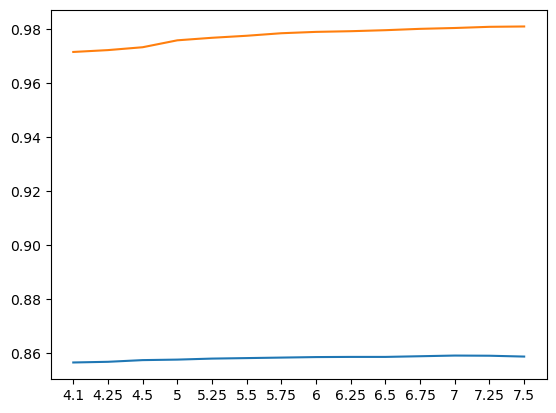

In [20]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=7$

In [54]:
best_l2_lr_model = LogisticRegression(C=7, penalty='l2', solver='lbfgs', multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9805
	- Micro F1 score: 0.9805
	- Macro F1 score: 0.9745
Score of on test are:
	- Accuracy score: 0.8618
	- Micro F1 score: 0.8618
	- Macro F1 score: 0.8141


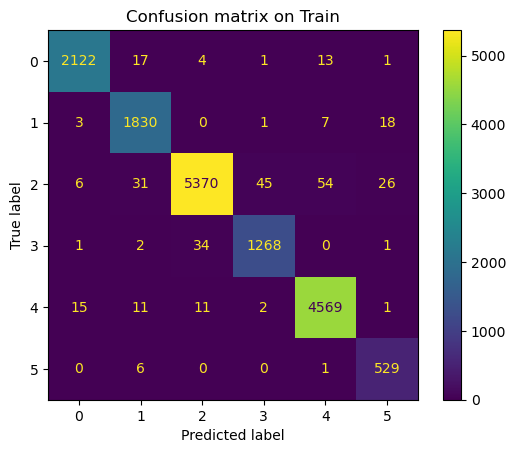

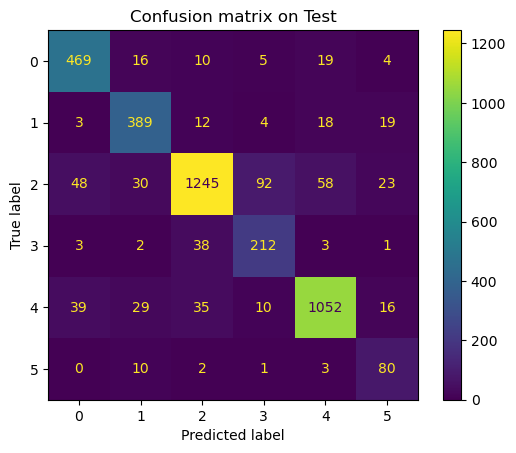

In [55]:
best_l2_lr_model.fit(X_train, y_train)
evaluate_model(best_l2_lr_model, X_train, X_test, y_train, y_test, include_training=True)

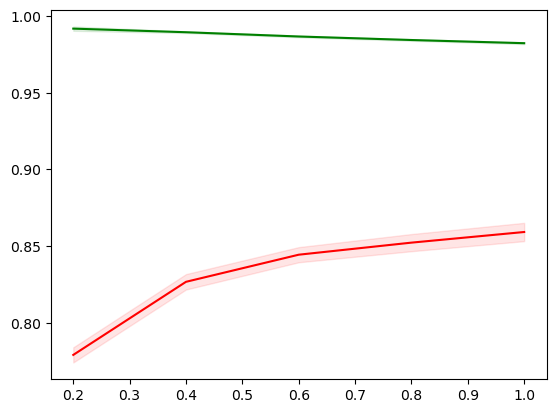

In [32]:
draw_learning_curve(best_l2_lr_model, X_train, y_train)

## Elastic regularization

In [33]:
dict_param = {
    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100],
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

lr_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='ovr')
grid_search = GridSearchCV(lr_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [36]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)
df = df[df['score'] < 0.86]
print("Bad hyperparameter:")
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 35 // len(dict_param[param]):
      print(param, value)

          C  l1_ratio     score
0     0.001       0.1  0.338688
1     0.001       0.3  0.338688
2     0.001       0.5  0.338688
3     0.001       0.7  0.338688
4     0.001       0.9  0.328937
5     0.010       0.1  0.338688
6     0.010       0.3  0.338688
7     0.010       0.5  0.338688
8     0.010       0.7  0.338688
9     0.010       0.9  0.338688
10    0.100       0.1  0.611625
11    0.100       0.3  0.578500
12    0.100       0.5  0.545687
13    0.100       0.7  0.511000
14    0.100       0.9  0.476750
15    1.000       0.1  0.832688
16    1.000       0.3  0.838937
17    1.000       0.5  0.843875
18    1.000       0.7  0.848062
19    1.000       0.9  0.855937
20    5.000       0.1  0.859750
21    5.000       0.3  0.862063
22    5.000       0.5  0.865187
23    5.000       0.7  0.866375
24    5.000       0.9  0.867188
25   10.000       0.1  0.860812
26   10.000       0.3  0.863500
27   10.000       0.5  0.864750
28   10.000       0.7  0.866375
29   10.000       0.9  0.865812
30  100.

In [37]:
dict_param = {
    'C' : np.logspace(1, 2, 6),
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

lr_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='ovr')
grid_search = GridSearchCV(lr_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([ 10.        ,  15.84893192,  25.11886432,  39.81071706,
        63.09573445, 100.        ]),
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [39]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)

             C  l1_ratio     score
0    10.000000       0.1  0.860875
1    10.000000       0.3  0.863438
2    10.000000       0.5  0.864625
3    10.000000       0.7  0.866313
4    10.000000       0.9  0.865687
5    15.848932       0.1  0.860563
6    15.848932       0.3  0.863625
7    15.848932       0.5  0.864312
8    15.848932       0.7  0.865500
9    15.848932       0.9  0.865687
10   25.118864       0.1  0.859938
11   25.118864       0.3  0.862438
12   25.118864       0.5  0.863312
13   25.118864       0.7  0.864375
14   25.118864       0.9  0.864750
15   39.810717       0.1  0.859063
16   39.810717       0.3  0.860563
17   39.810717       0.5  0.861750
18   39.810717       0.7  0.862625
19   39.810717       0.9  0.863375
20   63.095734       0.1  0.858187
21   63.095734       0.3  0.859250
22   63.095734       0.5  0.860438
23   63.095734       0.7  0.861563
24   63.095734       0.9  0.862562
25  100.000000       0.1  0.856750
26  100.000000       0.3  0.858687
27  100.000000      

In [40]:
print(grid_search.best_estimator_, grid_search.best_score_)

LogisticRegression(C=10.0, l1_ratio=0.7000000000000001, multi_class='ovr',
                   penalty='elasticnet', solver='saga') 0.8663125


In [41]:
best_en_lr_model = LogisticRegression(C=10.0, l1_ratio=0.7000000000000001, multi_class='ovr',
                   penalty='elasticnet', solver='saga') 

Score of on train are:
	- Accuracy score: 0.9847
	- Micro F1 score: 0.9847
	- Macro F1 score: 0.9806
Score of on test are:
	- Accuracy score: 0.8670
	- Micro F1 score: 0.8670
	- Macro F1 score: 0.8236


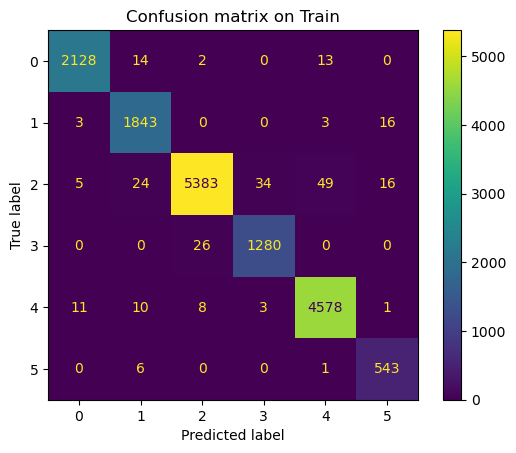

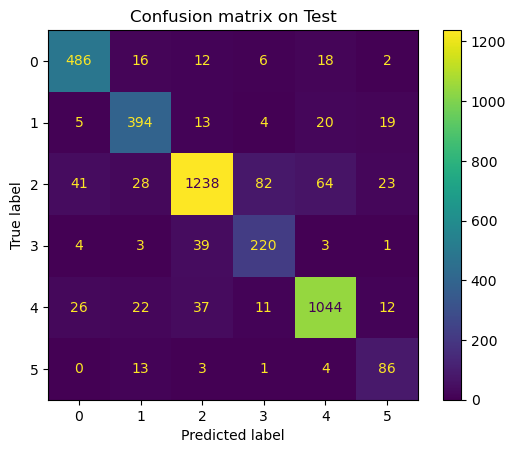

In [42]:
best_en_lr_model.fit(X_train, y_train)
evaluate_model(best_en_lr_model, X_train, X_test, y_train, y_test, include_training=True)

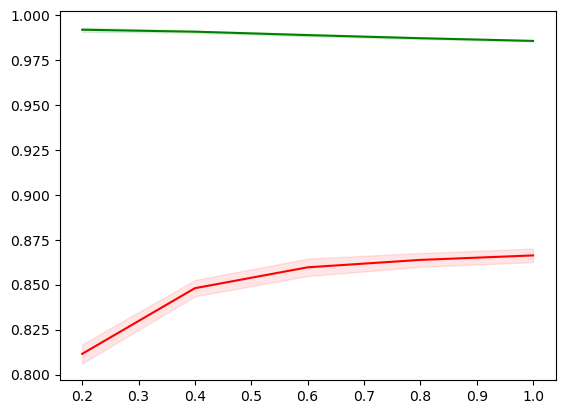

In [43]:
draw_learning_curve(best_en_lr_model, X_train, y_train)

# Conclusion

There are a few difference among the accuracy of these 3 regularization. However, L1 regularization gives the best performance then I will choose it to be the best model in this notebook.

In [56]:
best_lr_model = best_l1_lr_model

In [57]:
directory = "data/models/lr/"

dump(best_lr_model, directory + "best_lr_tfidf_l1_model.joblib")

['data/models/lr/best_lr_tfidf_l1_model.joblib']